<a href="https://colab.research.google.com/github/Ayush245101/Distributed-Machine-Learning/blob/main/Data_Analysis_and_Management_using_Hadoop_%26_Hive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


###MapReduce Programs (Python)

We’ll simulate MapReduce using Python (mrjob library style or manual reduce-by-key).

Task 1 — Average account balance per job type

In [11]:
avg_balance = df.groupby('job')['balance'].mean().reset_index()
print("✅ Average Balance per Job Type:")
print(avg_balance)

✅ Average Balance per Job Type:
              job      balance
0          admin.  1226.736402
1     blue-collar  1085.161734
2    entrepreneur  1645.125000
3       housemaid  2083.803571
4      management  1766.928793
5         retired  2319.191304
6   self-employed  1392.409836
7        services  1103.956835
8         student  1543.821429
9      technician  1330.996094
10     unemployed  1089.421875
11        unknown  1501.710526


Task 2 — Count of individuals with/without housing loan per education category

In [12]:
loan_count = df.groupby(['education', 'housing']).size().unstack(fill_value=0)
print("✅ Count with/without housing loan:")
print(loan_count)


✅ Count with/without housing loan:
housing     no   yes
education           
primary    295   383
secondary  876  1430
tertiary   687   663
unknown    104    83


Task 3 — Clients contacted per month with term deposit status

In [13]:
month_contact = df.groupby(['month', 'y']).size().unstack(fill_value=0)
print("✅ Contacts per Month & Subscription Status:")
print(month_contact)


✅ Contacts per Month & Subscription Status:
y        no  yes
month           
apr     237   56
aug     554   79
dec      11    9
feb     184   38
jan     132   16
jul     645   61
jun     476   55
mar      28   21
may    1305   93
nov     350   39
oct      43   37
sep      35   17


Task 4 — Average duration per previous campaign outcome

In [14]:
avg_duration = df.groupby('poutcome')['duration'].mean().reset_index()
print("✅ Average Duration (seconds) per Poutcome:")
print(avg_duration)

✅ Average Duration (seconds) per Poutcome:
  poutcome    duration
0  failure  254.383673
1    other  273.832487
2  success  338.635659
3  unknown  262.103104


Task 5 — Relationship between Age & Balance (summarized)

In [15]:
relation = df.groupby('age')['balance'].mean().reset_index()
print("✅ Average Balance per Age:")
print(relation.head(10))


✅ Average Balance per Age:
   age      balance
0   19   393.500000
1   20   661.333333
2   21  1774.285714
3   22  1455.333333
4   23  2117.950000
5   24   634.625000
6   25  1240.068182
7   26   788.558442
8   27   851.776596
9   28  1025.097087


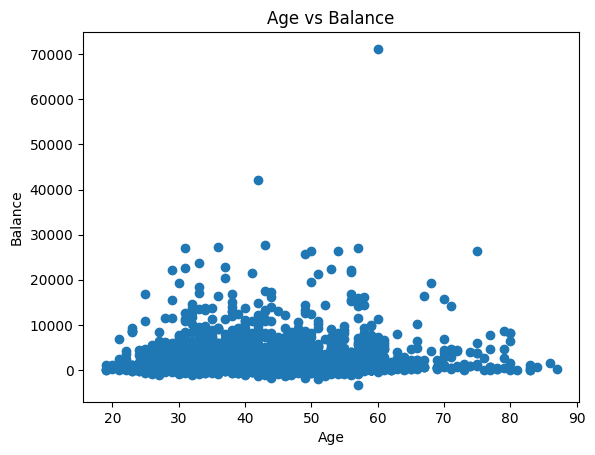

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['balance'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Age vs Balance')
plt.show()


###Part 3: Hive Simulation in Colab

We’ll use Pandas + DuckDB to simulate Hive queries (HiveQL → SQL equivalent).

STEP 1: Install DuckDB (for SQL on DataFrame)

In [17]:
!pip install duckdb
import duckdb


STEP 2: Create Database & Table (Hive Simulation)

In [20]:
import duckdb
import pandas as pd

df = pd.read_csv('/content/bank.csv')
duckdb.register('client_info', df)

# Now you can query it
result = duckdb.sql("SELECT * FROM client_info LIMIT 5").df()
print(result)


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


🧩 HiveQL Queries
1️⃣ Count total number of clients

In [21]:
duckdb.sql("SELECT COUNT(*) AS total_clients FROM client_info;")


┌───────────────┐
│ total_clients │
│     int64     │
├───────────────┤
│          4521 │
└───────────────┘

Display first 10 rows

In [22]:
duckdb.sql("SELECT * FROM client_info LIMIT 10;")

┌───────┬───────────────┬─────────┬───────────┬─────────┬─────────┬─────────┬─────────┬──────────┬───────┬─────────┬──────────┬──────────┬───────┬──────────┬──────────┬─────────┐
│  age  │      job      │ marital │ education │ default │ balance │ housing │  loan   │ contact  │  day  │  month  │ duration │ campaign │ pdays │ previous │ poutcome │    y    │
│ int64 │    varchar    │ varchar │  varchar  │ varchar │  int64  │ varchar │ varchar │ varchar  │ int64 │ varchar │  int64   │  int64   │ int64 │  int64   │ varchar  │ varchar │
├───────┼───────────────┼─────────┼───────────┼─────────┼─────────┼─────────┼─────────┼──────────┼───────┼─────────┼──────────┼──────────┼───────┼──────────┼──────────┼─────────┤
│    30 │ unemployed    │ married │ primary   │ no      │    1787 │ no      │ no      │ cellular │    19 │ oct     │       79 │        1 │    -1 │        0 │ unknown  │ no      │
│    33 │ services      │ married │ secondary │ no      │    4789 │ yes     │ yes     │ cellular │    11 

 Married clients with personal loan

In [23]:
duckdb.sql("""
SELECT * FROM client_info
WHERE marital='married' AND loan='yes';
""")


┌───────┬───────────────┬─────────┬───────────┬─────────┬─────────┬─────────┬─────────┬───────────┬───────┬─────────┬──────────┬──────────┬───────┬──────────┬──────────┬─────────┐
│  age  │      job      │ marital │ education │ default │ balance │ housing │  loan   │  contact  │  day  │  month  │ duration │ campaign │ pdays │ previous │ poutcome │    y    │
│ int64 │    varchar    │ varchar │  varchar  │ varchar │  int64  │ varchar │ varchar │  varchar  │ int64 │ varchar │  int64   │  int64   │ int64 │  int64   │ varchar  │ varchar │
├───────┼───────────────┼─────────┼───────────┼─────────┼─────────┼─────────┼─────────┼───────────┼───────┼─────────┼──────────┼──────────┼───────┼──────────┼──────────┼─────────┤
│    33 │ services      │ married │ secondary │ no      │    4789 │ yes     │ yes     │ cellular  │    11 │ may     │      220 │        1 │   339 │        4 │ failure  │ no      │
│    30 │ management    │ married │ tertiary  │ no      │    1476 │ yes     │ yes     │ unknown   │ 

Top 10 clients with highest balance

In [24]:
duckdb.sql("""
SELECT job, marital, balance
FROM client_info
ORDER BY balance DESC
LIMIT 10;
""")


┌──────────────┬──────────┬─────────┐
│     job      │ marital  │ balance │
│   varchar    │ varchar  │  int64  │
├──────────────┼──────────┼─────────┤
│ retired      │ married  │   71188 │
│ entrepreneur │ married  │   42045 │
│ technician   │ single   │   27733 │
│ management   │ married  │   27359 │
│ technician   │ married  │   27069 │
│ housemaid    │ single   │   26965 │
│ retired      │ married  │   26452 │
│ services     │ married  │   26394 │
│ management   │ divorced │   26306 │
│ retired      │ single   │   25824 │
├──────────────┴──────────┴─────────┤
│ 10 rows                 3 columns │
└───────────────────────────────────┘

Average age per job category

In [25]:
duckdb.sql("SELECT job, AVG(age) AS avg_age FROM client_info GROUP BY job;")


┌───────────────┬────────────────────┐
│      job      │      avg_age       │
│    varchar    │       double       │
├───────────────┼────────────────────┤
│ blue-collar   │  40.15644820295983 │
│ self-employed │  41.45355191256831 │
│ technician    │ 39.470052083333336 │
│ student       │ 26.821428571428573 │
│ housemaid     │ 47.339285714285715 │
│ unemployed    │           40.90625 │
│ services      │  38.57074340527578 │
│ management    │  40.54076367389061 │
│ entrepreneur  │  42.01190476190476 │
│ admin.        │  39.68200836820084 │
│ retired       │ 61.869565217391305 │
│ unknown       │  48.10526315789474 │
├───────────────┴────────────────────┤
│ 12 rows                  2 columns │
└────────────────────────────────────┘

Total clients per education level with credit default

In [28]:
duckdb.sql("""
SELECT education, COUNT(*) AS total_defaulted
FROM client_info
WHERE "default"='yes'
GROUP BY education;
""")


┌───────────┬─────────────────┐
│ education │ total_defaulted │
│  varchar  │      int64      │
├───────────┼─────────────────┤
│ primary   │              10 │
│ secondary │              46 │
│ tertiary  │              17 │
│ unknown   │               3 │
└───────────┴─────────────────┘

Advanced Hive-Like Queries 1 Top 5 job categories by highest average balance + subscription rate

In [29]:
duckdb.sql("""
WITH stats AS (
  SELECT job,
         AVG(balance) AS avg_balance,
         SUM(CASE WHEN y='yes' THEN 1 ELSE 0 END)*100.0/COUNT(*) AS subscription_rate
  FROM client_info
  GROUP BY job
)
SELECT * FROM stats ORDER BY avg_balance DESC LIMIT 5;
""")


┌──────────────┬────────────────────┬────────────────────┐
│     job      │    avg_balance     │ subscription_rate  │
│   varchar    │       double       │       double       │
├──────────────┼────────────────────┼────────────────────┤
│ retired      │  2319.191304347826 │  23.47826086956522 │
│ housemaid    │ 2083.8035714285716 │               12.5 │
│ management   │ 1766.9287925696594 │ 13.519091847265221 │
│ entrepreneur │           1645.125 │  8.928571428571429 │
│ student      │ 1543.8214285714287 │  22.61904761904762 │
└──────────────┴────────────────────┴────────────────────┘

Month with highest contacts and success rate

In [30]:
duckdb.sql("""
SELECT month,
       COUNT(*) AS total_contacts,
       SUM(CASE WHEN y='yes' THEN 1 ELSE 0 END)*100.0/COUNT(*) AS success_rate
FROM client_info
GROUP BY month
ORDER BY total_contacts DESC
LIMIT 1;
""")


┌─────────┬────────────────┬───────────────────┐
│  month  │ total_contacts │   success_rate    │
│ varchar │     int64      │      double       │
├─────────┼────────────────┼───────────────────┤
│ may     │           1398 │ 6.652360515021459 │
└─────────┴────────────────┴───────────────────┘

Correlation between age and balance

In [31]:
duckdb.sql("SELECT corr(age, balance) AS age_balance_corr FROM client_info;")


┌─────────────────────┐
│  age_balance_corr   │
│       double        │
├─────────────────────┤
│ 0.08382014224477742 │
└─────────────────────┘

10️ Trend analysis — yearly clients contacted

(If your data has a year column, otherwise use month-wise trend)

In [32]:
duckdb.sql("""
SELECT month, COUNT(*) AS total_contacts
FROM client_info
GROUP BY month
ORDER BY total_contacts DESC;
""")


┌─────────┬────────────────┐
│  month  │ total_contacts │
│ varchar │     int64      │
├─────────┼────────────────┤
│ may     │           1398 │
│ jul     │            706 │
│ aug     │            633 │
│ jun     │            531 │
│ nov     │            389 │
│ apr     │            293 │
│ feb     │            222 │
│ jan     │            148 │
│ oct     │             80 │
│ sep     │             52 │
│ mar     │             49 │
│ dec     │             20 │
├─────────┴────────────────┤
│ 12 rows        2 columns │
└──────────────────────────┘

Anomaly Detection — unusual yearly balance by education

In [33]:
duckdb.sql("""
SELECT education, AVG(balance) AS avg_balance
FROM client_info
GROUP BY education
HAVING AVG(balance) > (SELECT AVG(balance) + 2*STDDEV(balance) FROM client_info);
""")


┌───────────┬─────────────┐
│ education │ avg_balance │
│  varchar  │   double    │
├───────────┴─────────────┤
│         0 rows          │
└─────────────────────────┘

12️ Impact of previous campaign outcomes on current success

In [34]:
duckdb.sql("""
SELECT poutcome,
       COUNT(*) AS total,
       SUM(CASE WHEN y='yes' THEN 1 ELSE 0 END)*100.0/COUNT(*) AS subscription_rate
FROM client_info
GROUP BY poutcome;
""")


┌──────────┬───────┬────────────────────┐
│ poutcome │ total │ subscription_rate  │
│ varchar  │ int64 │       double       │
├──────────┼───────┼────────────────────┤
│ unknown  │  3705 │  9.095816464237517 │
│ failure  │   490 │ 12.857142857142858 │
│ success  │   129 │  64.34108527131782 │
│ other    │   197 │ 19.289340101522843 │
└──────────┴───────┴────────────────────┘

Compare average contact duration (subscribed vs not)

In [35]:
duckdb.sql("""
SELECT y AS subscribed, AVG(duration) AS avg_duration
FROM client_info
GROUP BY y;
""")


┌────────────┬───────────────────┐
│ subscribed │   avg_duration    │
│  varchar   │      double       │
├────────────┼───────────────────┤
│ no         │          226.3475 │
│ yes        │ 552.7428023032629 │
└────────────┴───────────────────┘

### Summary of Analysis Results:

**Task 1 — Average account balance per job type:**
```
              job      balance
0          admin.  1226.736402
1     blue-collar  1085.161734
2    entrepreneur  1645.125000
3       housemaid  2083.803571
4      management  1766.928793
5         retired  2319.191304
6   self-employed  1392.409836
7        services  1103.956835
8         student  1543.821429
9      technician  1330.996094
10     unemployed  1089.421875
11        unknown  1501.710526
```

**Task 2 — Count of individuals with/without housing loan per education category:**
```
housing     no   yes
education           
primary    295   383
secondary  876  1430
tertiary   687   663
unknown    104    83
```

**Task 3 — Clients contacted per month with term deposit status:**
```
y        no  yes
month           
apr     237   56
aug     554   79
dec      11    9
feb     184   38
jan     132   16
jul     645   61
jun     476   55
mar      28   21
may    1305   93
nov     350   39
oct      43   37
sep      35   17
```

**Task 4 — Average duration per previous campaign outcome:**
```
  poutcome    duration
0  failure  254.383673
1    other  273.832487
2  success  338.635659
3  unknown  262.103104
```

**Task 5 — Relationship between Age & Balance (summarized) (Top 10 ages):**
```
   age      balance
0   19   393.500000
1   20   661.333333
2   21  1774.285714
3   22  1455.333333
4   23  2117.950000
5   24   634.625000
6   25  1240.068182
7   26   788.558442
8   27   851.776596
9   28  1025.097087
```

**Count total number of clients:**
*   Total clients: 4521

**Top 10 clients with highest balance:**
```
     job      marital  balance
retired      married    71188
entrepreneur married    42045
technician   single     27733
management   married    27359
technician   married    27069
housemaid    single     26965
retired      married    26452
services     married    26394
management   divorced   26306
retired      single     25824
```

**Average age per job category:**
```
      job            avg_age       
blue-collar   40.15644820295983
self-employed 41.45355191256831
technician    39.470052083333336
student       26.821428571428573
housemaid     47.339285714285715
unemployed    40.90625        
services      38.57074340527578
management    40.54076367389061
entrepreneur  42.01190476190476
admin.        39.68200836820084
retired       61.869565217391305
unknown       48.10526315789474
```

**Total clients per education level with credit default:**
```
education total_defaulted
primary              10
secondary            46
tertiary             17
unknown               3
```

**Top 5 job categories by highest average balance + subscription rate:**
```
     job          avg_balance subscription_rate  
retired      2319.191304347826 23.47826086956522
housemaid    2083.8035714285716              12.5
management   1766.9287925696594 13.519091847265221
entrepreneur           1645.125  8.928571428571429
student      1543.8214285714287  22.61904761904762
```

**Month with highest contacts and success rate:**
*   Month: `may`, Total Contacts: `1398`, Success Rate: `6.65%`

**Correlation between age and balance:**
*   Correlation: `0.0838` (a weak positive correlation)

**Trend analysis — yearly clients contacted (month-wise trend) (ordered by total contacts):**
```
  month  total_contacts
may               1398
jul                706
aug                633
jun                531
nov                389
apr                293
feb                222
jan                148
oct                 80
sep                 52
mar                 49
dec                 20
```

**Anomaly Detection — unusual yearly balance by education:**
*   No education levels found with average balance significantly higher than the overall average (i.e., above `AVG(balance) + 2*STDDEV(balance)`).

**Impact of previous campaign outcomes on current success:**
```
poutcome total subscription_rate  
unknown   3705 9.095816464237517
failure    490 12.857142857142858
success    129 64.34108527131782
other      197 19.289340101522843
```

**Compare average contact duration (subscribed vs not):**
```
subscribed   avg_duration    
no          226.3475
yes         552.7428023032629
```